In [187]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import timezone, timedelta
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator
import plotly as px

In [188]:
df = pd.read_excel('all_about_swipe_users_2 (1).xlsx')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            143 non-null    int64         
 1   password                      0 non-null      float64       
 2   last_login                    0 non-null      float64       
 3   is_superuser                  143 non-null    bool          
 4   is_staff                      143 non-null    bool          
 5   is_active                     143 non-null    bool          
 6   date_joined                   143 non-null    datetime64[ns]
 7   email                         142 non-null    object        
 8   key                           143 non-null    object        
 9   first_name                    143 non-null    object        
 10  last_name                     143 non-null    object        
 11  status                        14

In [190]:
df.status.value_counts()

act    143
Name: status, dtype: int64

In [191]:
df.group_name.value_counts()

Xerox                128
Xerox Наблюдатели      8
Name: group_name, dtype: int64

In [192]:
#убираем данные по наблюдателям
df=df.query("group_name=='Xerox'")

Проверяем распределение данных по основным числовым показателям

In [193]:
df.count_of_finished_lessons.describe()

count    119.000000
mean      20.243697
std       14.950748
min        1.000000
25%        6.000000
50%       17.000000
75%       38.000000
max       40.000000
Name: count_of_finished_lessons, dtype: float64

In [385]:
colors = ['darkcyan']

<AxesSubplot:>

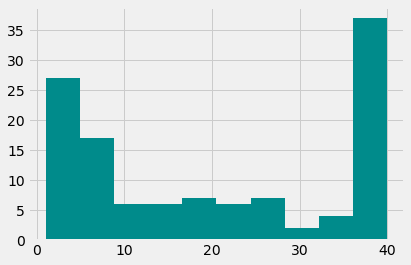

In [386]:
df.count_of_finished_lessons.hist(color=colors)

<AxesSubplot:>

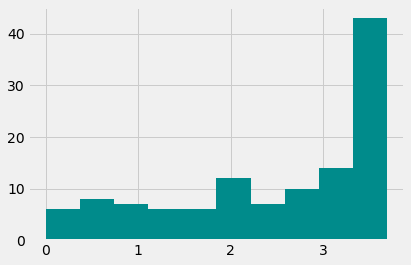

In [387]:
#Логарифмирование
df['count_of_finished_lessons_LOG']=np.log(df.count_of_finished_lessons)
df.count_of_finished_lessons_LOG.hist(color=colors)

In [196]:
df.count_of_finished_lessons.value_counts()

39.0    22
38.0     9
2.0      8
3.0      7
8.0      7
1.0      6
4.0      6
25.0     5
17.0     4
40.0     4
6.0      4
7.0      4
23.0     3
15.0     3
11.0     3
37.0     2
13.0     2
36.0     2
12.0     2
33.0     2
5.0      2
21.0     2
26.0     1
20.0     1
32.0     1
18.0     1
24.0     1
31.0     1
9.0      1
19.0     1
27.0     1
14.0     1
Name: count_of_finished_lessons, dtype: int64

In [197]:
df.average_points_for_lesson.describe()

count    120.000000
mean       7.333568
std        1.641949
min        2.000000
25%        6.433333
50%        7.629121
75%        8.544872
max        9.900000
Name: average_points_for_lesson, dtype: float64

<AxesSubplot:>

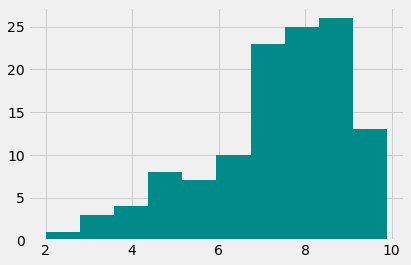

In [388]:
#можем использовать для анализа этот показатель, ниже прологарифмируем или уберем несколько аномальных значений
df.average_points_for_lesson.hist(color=colors)

<AxesSubplot:>

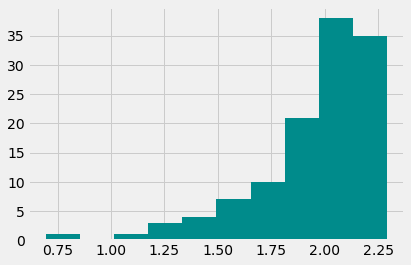

In [389]:
#Логарифмирование
df['average_points_for_lesson_LOG']=np.log(df.average_points_for_lesson)
df.average_points_for_lesson_LOG.hist(color=colors)

In [200]:
df.count_of_items.describe()   

count     120.000000
mean      764.958333
std       548.522268
min         6.000000
25%       251.500000
50%       721.500000
75%      1417.000000
max      1468.000000
Name: count_of_items, dtype: float64

<AxesSubplot:>

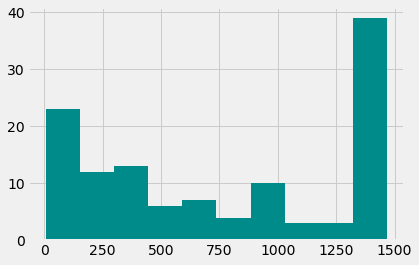

In [390]:
df.count_of_items.hist(color=colors)  

<AxesSubplot:>

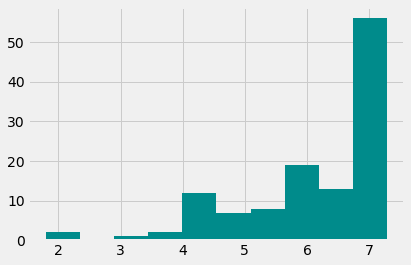

In [391]:
#Логарифмирование
df['count_of_items_LOG']=np.log(df.count_of_items)
df.count_of_items_LOG.hist(color=colors)

In [203]:
df.count_of_lessons.describe()

count    120.000000
mean      20.783333
std       14.909916
min        1.000000
25%        6.750000
50%       18.500000
75%       39.000000
max       40.000000
Name: count_of_lessons, dtype: float64

<AxesSubplot:>

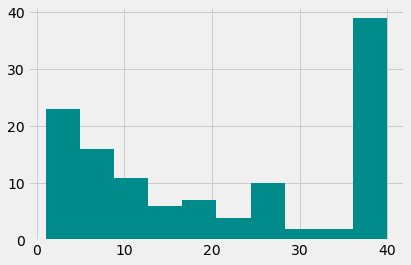

In [392]:
df.count_of_lessons.hist(color=colors)

<AxesSubplot:>

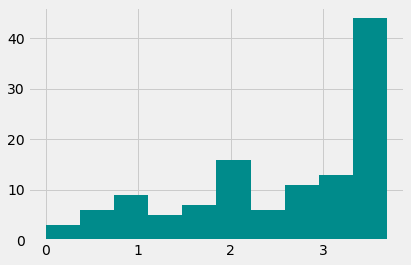

In [393]:
#Логарифмирование
df['count_of_lessons_LOG']=np.log(df.count_of_lessons)
df.count_of_lessons_LOG.hist(color=colors)

<AxesSubplot:>

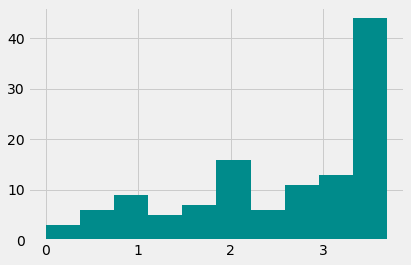

In [394]:
#Логарифмирование
df['count_of_lessons_LOG']=np.log(df.count_of_lessons)
df.count_of_lessons_LOG.hist(color=colors)

In [207]:
df.average_timespent_for_item.describe()
#позже переведем временные показатели в минуты

count                            120
unique                           120
top       1899-12-29 00:00:08.060000
freq                               1
first     1899-12-29 00:00:04.710000
last      1899-12-29 00:00:50.493000
Name: average_timespent_for_item, dtype: object

In [208]:
df.total_sum_of_points.describe()   

count    120.000000
mean     169.033333
std      135.628009
min        2.000000
25%       41.750000
50%      143.000000
75%      321.250000
max      396.000000
Name: total_sum_of_points, dtype: float64

<AxesSubplot:>

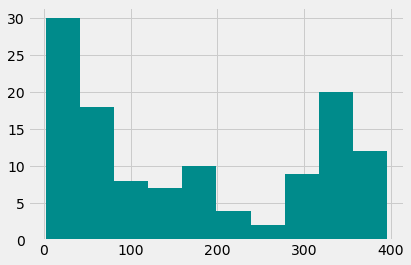

In [395]:
df.total_sum_of_points.hist(color=colors)   

<AxesSubplot:>

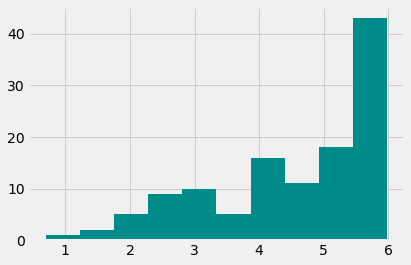

In [396]:
#Логарифмирование
df['total_sum_of_points_LOG']=np.log(df.total_sum_of_points)
df.total_sum_of_points_LOG.hist(color=colors)

In [211]:
df.average_points_for_lesson.describe()

count    120.000000
mean       7.333568
std        1.641949
min        2.000000
25%        6.433333
50%        7.629121
75%        8.544872
max        9.900000
Name: average_points_for_lesson, dtype: float64

<AxesSubplot:>

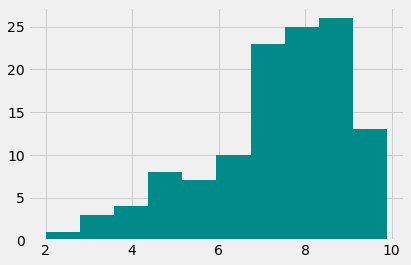

In [397]:
df.average_points_for_lesson.hist(color=colors)

<AxesSubplot:>

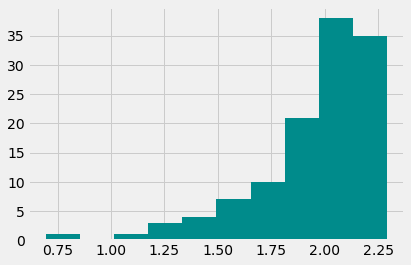

In [398]:
#Логарифмирование
df['average_points_for_lesson_LOG']=np.log(df.average_points_for_lesson)
df.average_points_for_lesson_LOG.hist(color=colors)

In [214]:
df.average_points_for_item.describe()

count    120.000000
mean       1.658508
std        0.271427
min        1.000000
25%        1.561303
50%        1.698263
75%        1.754276
max        4.000000
Name: average_points_for_item, dtype: float64

<AxesSubplot:>

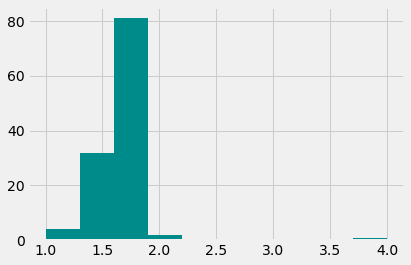

In [399]:
df.average_points_for_item.hist(color=colors)

In [216]:
#Переводим временные данные в минуты (с десятичными) для возможности сравнения
df['total_time_spent_in_apps_seconds']=df.total_time_spent_in_apps.dt.second+df.total_time_spent_in_apps.dt.minute*60+df.total_time_spent_in_apps.dt.hour*60*60
df['total_time_spent_in_apps_minutes']=df['total_time_spent_in_apps_seconds']/60
df['average_timespent_for_item_seconds']=df.average_timespent_for_item.dt.second+df.average_timespent_for_item.dt.minute*60+df.average_timespent_for_item.dt.hour*60*60
df['average_timespent_for_item_minutes']=df['average_timespent_for_item_seconds']/60
df['average_timespent_for_lesson_seconds']=df.average_timespent_for_lesson.dt.second+df.average_timespent_for_lesson.dt.minute*60+df.average_timespent_for_lesson.dt.hour*60*60
df['average_timespent_for_lesson_minutes']=df['average_timespent_for_lesson_seconds']/60

In [217]:
df['total_time_spent_in_apps_minutes'].describe()

count     120.000000
mean      196.108056
std       186.927295
min         0.850000
25%        51.004167
50%       149.200000
75%       292.425000
max      1204.283333
Name: total_time_spent_in_apps_minutes, dtype: float64

<AxesSubplot:>

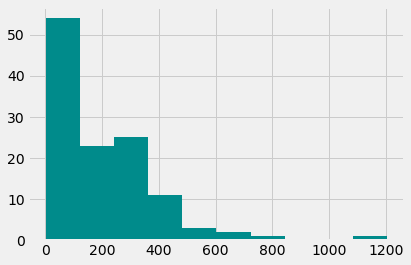

In [400]:
df.total_time_spent_in_apps_minutes.hist(color=colors)

<AxesSubplot:>

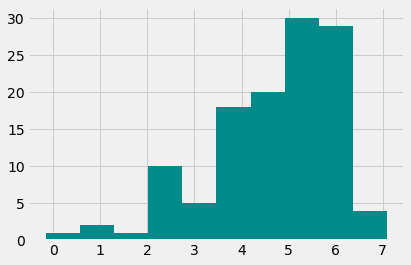

In [401]:
#Логарифмирование
df['total_time_spent_in_apps_minutes_LOG']=np.log(df.total_time_spent_in_apps_minutes)
df.total_time_spent_in_apps_minutes_LOG.hist(color=colors)

In [220]:
df.average_timespent_for_item_minutes.describe()

count    120.000000
mean       0.239444
std        0.107491
min        0.066667
25%        0.166667
50%        0.233333
75%        0.283333
max        0.833333
Name: average_timespent_for_item_minutes, dtype: float64

<AxesSubplot:>

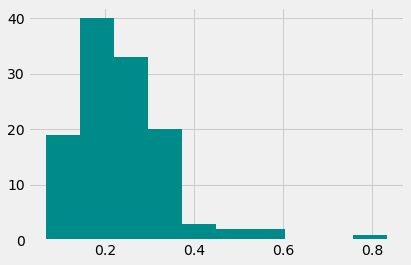

In [402]:
df.average_timespent_for_item_minutes.hist(color=colors)

<AxesSubplot:>

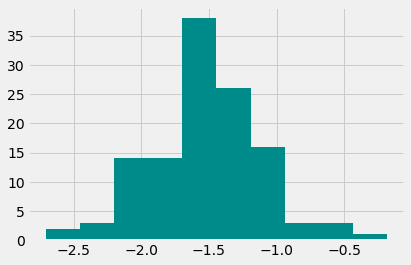

In [403]:
#Логарифмирование
df['average_timespent_for_item_minutes_LOG']=np.log(df.average_timespent_for_item_minutes)
df.average_timespent_for_item_minutes_LOG.hist(color=colors)

In [223]:
df.average_timespent_for_lesson_minutes.describe()

count    120.000000
mean       9.945278
std        4.766064
min        0.850000
25%        6.733333
50%        9.416667
75%       12.187500
max       34.166667
Name: average_timespent_for_lesson_minutes, dtype: float64

<AxesSubplot:>

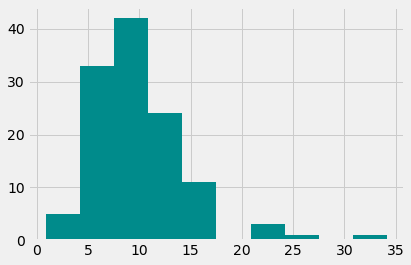

In [404]:
df.average_timespent_for_lesson_minutes.hist(color=colors)

<AxesSubplot:>

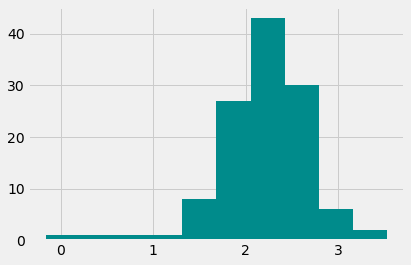

In [405]:
#Логарифмирование
df['average_timespent_for_lesson_minutes_LOG']=np.log(df.average_timespent_for_lesson_minutes)
df.average_timespent_for_lesson_minutes_LOG.hist(color=colors)

# КОРРЕЛЯЦИОННЫЙ АНАЛИЗ

Попробуем проаналировать корреляцию между показателями:

    average_points_for_lesson - среднее количество баллов за урок
    average_timespent_for_lesson_minutes - среднее количество проведенного времени за уроком,
  
где среднее количество баллов за урок будет зависимой переменной.

In [226]:
x = abs(df.average_timespent_for_lesson_minutes_LOG)
y = df.average_points_for_lesson

In [227]:
x.describe()

count    120.000000
mean       2.186240
std        0.499691
min        0.162519
25%        1.907033
50%        2.242481
75%        2.500411
max        3.531251
Name: average_timespent_for_lesson_minutes_LOG, dtype: float64

In [228]:
y.describe()

count    120.000000
mean       7.333568
std        1.641949
min        2.000000
25%        6.433333
50%        7.629121
75%        8.544872
max        9.900000
Name: average_points_for_lesson, dtype: float64

<AxesSubplot:>

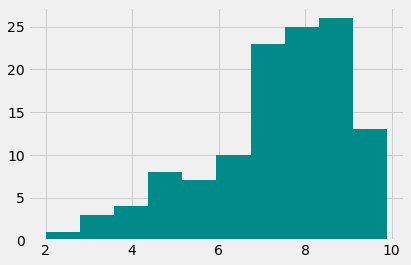

In [407]:
y.hist(color=colors)

In [408]:
#избавление от NAN
x=x[~np.isnan (x)]
y=y[~np.isnan (y)]

<AxesSubplot:>

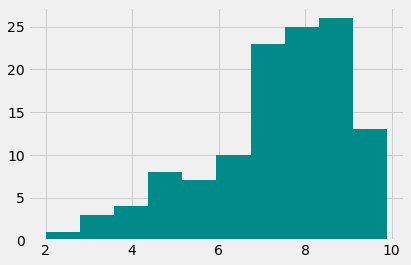

In [409]:
y.hist(color=colors)

In [234]:
np.corrcoef(x, y)

array([[1.        , 0.33892904],
       [0.33892904, 1.        ]])

In [235]:
#коэффициент корреляции с помощью scipy
st.pearsonr(x, y)

(0.33892904295579573, 0.0001527037213866322)

In [236]:
#коэффициент корреляции по Спирману с помощью использования рангов
st.spearmanr(x, y)

SpearmanrResult(correlation=0.22211456523991127, pvalue=0.014760041575378835)

In [237]:
#коэффициент корреляции по Кендаллу - лучше всего в нашем случае, поскольку второй показатель не имеет нормального распределения
st.kendalltau(x, y)

KendalltauResult(correlation=0.1486165253269407, pvalue=0.01638936203405497)

В обоих случая plavue <0.05, однако теснота связи невысокая, коэффициент корреляции меньше - 0,5

In [238]:
x = sm.add_constant(x)  # добавить константу, чтобы был свободный член
model = sm.OLS(y, x)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                                OLS Regression Results                               
Dep. Variable:     average_points_for_lesson   R-squared:                       0.115
Model:                                   OLS   Adj. R-squared:                  0.107
Method:                        Least Squares   F-statistic:                     15.31
Date:                       Mon, 29 May 2023   Prob (F-statistic):           0.000153
Time:                               22:48:16   Log-Likelihood:                -221.96
No. Observations:                        120   AIC:                             447.9
Df Residuals:                            118   BIC:                             453.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Попытка построить регрессионую модель дала такие же результаты, тестота связи очень слабая.

Попробуем проаналировать корреляцию между показателями:

    total_sum_of_points - общее количество баллов набранных одним пользователем
    total_time_spent_in_apps_minutes_LOG - общее количество проведенного времени в приложении (логарифмированная переменная, там наблюдаем распределение более близкое к нормальному)
  
где общее количество баллов набранных одним пользователем за все курсы будет зависимой переменной


In [239]:
x_2 = abs(df.average_timespent_for_lesson_minutes_LOG)
y_2 = df.average_points_for_lesson

In [240]:
#избавление от NAN
x_2=x_2[~np.isnan (x_2)]
y_2=y_2[~np.isnan (y_2)]
#new_data = data[~np.isnan (data)]

In [241]:
x_2.describe()

count    120.000000
mean       2.186240
std        0.499691
min        0.162519
25%        1.907033
50%        2.242481
75%        2.500411
max        3.531251
Name: average_timespent_for_lesson_minutes_LOG, dtype: float64

In [242]:
y_2.describe()

count    120.000000
mean       7.333568
std        1.641949
min        2.000000
25%        6.433333
50%        7.629121
75%        8.544872
max        9.900000
Name: average_points_for_lesson, dtype: float64

<AxesSubplot:>

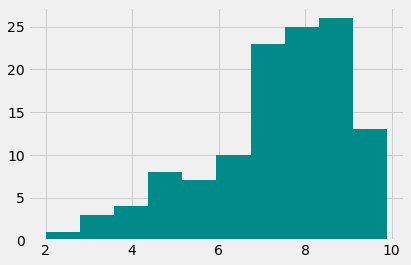

In [410]:
y_2.hist(color=colors)

In [245]:
np.corrcoef(x_2, y_2)

array([[1.        , 0.33892904],
       [0.33892904, 1.        ]])

In [246]:
#коэффициент корреляции с помощью scipy
st.pearsonr(x_2, y_2)

(0.33892904295579573, 0.0001527037213866322)

In [247]:
#коэффициент корреляции по Спирману с помощью использования рангов
st.spearmanr(x_2, y_2)

SpearmanrResult(correlation=0.22211456523991127, pvalue=0.014760041575378835)

In [248]:
#коэффициент корреляции по Кендаллу - лучше всего в нашем случае, поскольку второй показатель не имеет нормального распределения
st.kendalltau(x_2, y_2)

KendalltauResult(correlation=0.1486165253269407, pvalue=0.01638936203405497)

In [249]:
x_2 = sm.add_constant(x_2)  # добавить константу, чтобы был свободный член
model = sm.OLS(y_2, x_2)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                                OLS Regression Results                               
Dep. Variable:     average_points_for_lesson   R-squared:                       0.115
Model:                                   OLS   Adj. R-squared:                  0.107
Method:                        Least Squares   F-statistic:                     15.31
Date:                       Mon, 29 May 2023   Prob (F-statistic):           0.000153
Time:                               22:48:19   Log-Likelihood:                -221.96
No. Observations:                        120   AIC:                             447.9
Df Residuals:                            118   BIC:                             453.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Результаты схожи с предыдущими. Теснота связи между переменными очень слабая.

Попробуем проаналировать корреляцию между показателями:

    count_of_finished_lessons - количество пройденных до конца уроков
    average_timespent_for_lesson_minutes - среднее количество проведенного времени за уроком,
  
где среднее количество баллов за урок будет зависимой переменной.

In [250]:
x_3 = abs(df.average_timespent_for_lesson_minutes_LOG)
y_3 = df.count_of_finished_lessons

In [251]:
df.average_timespent_for_lesson_minutes.describe()

count    120.000000
mean       9.945278
std        4.766064
min        0.850000
25%        6.733333
50%        9.416667
75%       12.187500
max       34.166667
Name: average_timespent_for_lesson_minutes, dtype: float64

In [252]:
df.count_of_finished_lessons.describe()

count    119.000000
mean      20.243697
std       14.950748
min        1.000000
25%        6.000000
50%       17.000000
75%       38.000000
max       40.000000
Name: count_of_finished_lessons, dtype: float64

In [253]:
#избавление от NAN
x_3=x_3[~np.isnan (x_3)]
y_3=y_3[~np.isnan (y_3)]

In [254]:
x_3.describe()

count    120.000000
mean       2.186240
std        0.499691
min        0.162519
25%        1.907033
50%        2.242481
75%        2.500411
max        3.531251
Name: average_timespent_for_lesson_minutes_LOG, dtype: float64

In [255]:
y_3.describe()

count    119.000000
mean      20.243697
std       14.950748
min        1.000000
25%        6.000000
50%       17.000000
75%       38.000000
max       40.000000
Name: count_of_finished_lessons, dtype: float64

<AxesSubplot:>

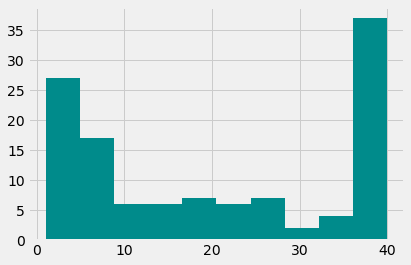

In [411]:
y_3.hist(color=colors)

Количество данных не совпало по этим двум показателям

In [257]:
x_3.describe()

count    120.000000
mean       2.186240
std        0.499691
min        0.162519
25%        1.907033
50%        2.242481
75%        2.500411
max        3.531251
Name: average_timespent_for_lesson_minutes_LOG, dtype: float64

Можем либо удалить из большего массива либо добавить в меньший еще одно среднее значение

In [258]:
x_3=x_3.drop(0)

In [259]:
x_3.describe()

count    119.000000
mean       2.190011
std        0.500086
min        0.162519
25%        1.919344
50%        2.242481
75%        2.500752
max        3.531251
Name: average_timespent_for_lesson_minutes_LOG, dtype: float64

In [260]:
np.corrcoef(x_3, y_3)

array([[1.        , 0.04556696],
       [0.04556696, 1.        ]])

In [261]:
#коэффициент корреляции с помощью scipy
st.pearsonr(x_3, y_3)

(0.045566962496661215, 0.6226586883428709)

In [262]:
#коэффициент корреляции по Спирману с помощью использования рангов
st.spearmanr(x_3, y_3)

SpearmanrResult(correlation=0.06257467686107554, pvalue=0.4989981370091875)

In [263]:
#коэффициент корреляции по Кендаллу - лучше всего в нашем случае, поскольку второй показатель не имеет нормального распределения
st.kendalltau(x_3, y_3)

KendalltauResult(correlation=0.04482675464459871, pvalue=0.48170189479232994)

По результатм оценки показателей p-value и коэффициентам корреляции - связь между переменными отсутствует 

# КЛАСТЕРНЫЙ АНАЛИЗ

In [264]:
#Выбираем переменные для анализа     
cols = ["count_of_items", "count_of_lessons", "count_of_finished_lessons",
        "average_timespent_for_item_minutes", "total_sum_of_points",
        "total_time_spent_in_apps_minutes", "average_points_for_lesson",
       "average_points_for_item"]
data=df[cols]

In [265]:
data_adj = data.copy()
data_adj.dropna (how='all') 

,count_of_items,count_of_lessons,count_of_finished_lessons,average_timespent_for_item_minutes,total_sum_of_points,total_time_spent_in_apps_minutes,average_points_for_lesson,average_points_for_item
0,314.0,8.0,6.0,0.133333,51.0,42.183333,6.375000,1.500000
1,1418.0,39.0,39.0,0.266667,335.0,392.333333,8.589744,1.744792
2,223.0,6.0,6.0,0.283333,38.0,66.100000,6.333333,1.407407
3,459.0,12.0,11.0,0.316667,63.0,149.666667,5.727273,1.400000
5,1466.0,40.0,39.0,0.350000,340.0,516.500000,8.500000,1.717172
...,...,...,...,...,...,...,...,...
135,715.0,19.0,17.0,0.333333,146.0,248.800000,8.111111,1.536842
136,613.0,18.0,17.0,0.100000,105.0,67.533333,6.176471,1.418919
137,140.0,4.0,3.0,0.216667,33.0,32.583333,8.250000,1.571429
138,170.0,5.0,4.0,0.266667,27.0,46.483333,5.400000,1.500000


In [266]:
cat_col = ["count_of_items", "count_of_lessons", "count_of_finished_lessons",
        "average_timespent_for_item_minutes", "total_sum_of_points",
        "total_time_spent_in_apps_minutes", "average_points_for_lesson",
       "average_points_for_item"]

In [267]:
for col in cat_col:
    labelencoder = LabelEncoder()
    data_adj[col] = labelencoder.fit_transform(data_adj[col])

In [268]:
data_adj.head(7)

,count_of_items,count_of_lessons,count_of_finished_lessons,average_timespent_for_item_minutes,total_sum_of_points,total_time_spent_in_apps_minutes,average_points_for_lesson,average_points_for_item
0,30,7,5,4,26,22,19,16
1,78,28,30,12,85,104,74,71
2,24,5,5,13,21,35,18,10
3,39,10,9,15,35,59,13,8
5,82,29,30,17,87,112,68,58
7,65,20,22,8,64,75,58,54
8,59,19,20,7,59,65,50,38


In [269]:
#стандартизация x текущее-x среднее/делим на стандартное отклонение
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_adj)
scaled_data = pd.DataFrame(scaled_data, columns=data_adj.columns)

In [270]:
scaled_data

,count_of_items,count_of_lessons,count_of_finished_lessons,average_timespent_for_item_minutes,total_sum_of_points,total_time_spent_in_apps_minutes,average_points_for_lesson,average_points_for_item
0,-0.738659,-0.871915,-1.017625,-1.107326,-0.845592,-1.107114,-0.968234,-1.144760
1,0.997501,1.074685,1.096921,0.155371,0.948708,1.141825,0.790375,0.516227
2,-0.955679,-1.057305,-1.017625,0.313208,-0.997652,-0.750575,-1.000209,-1.325959
3,-0.413129,-0.593829,-0.679298,0.628882,-0.571886,-0.092349,-1.160082,-1.386358
4,1.142181,1.167381,1.096921,0.944557,1.009531,1.361234,0.598526,0.123630
...,...,...,...,...,...,...,...,...
123,-0.015259,-0.037657,-0.256389,0.786720,-0.054884,0.428747,0.150881,-1.023961
124,-0.159939,-0.130353,-0.256389,-1.423001,-0.298179,-0.723149,-1.032183,-1.265559
125,-1.281209,-1.242695,-1.271371,-0.318141,-1.058475,-1.189392,0.342729,-0.903162
126,-1.100359,-1.150000,-1.186789,0.155371,-1.088887,-0.997410,-1.287981,-1.144760


In [271]:
x_cluster=scaled_data.values
x_cluster

array([[-0.7386592 , -0.87191453, -1.0176251 , ..., -1.10711391,
        -0.96823395, -1.14475997],
       [ 0.99750075,  1.07468535,  1.09692056, ...,  1.14182505,
         0.79037467,  0.51622729],
       [-0.95567919, -1.057305  , -1.0176251 , ..., -0.7505748 ,
        -1.00020865, -1.32595858],
       ...,
       [-1.28120918, -1.24269546, -1.27137057, ..., -1.18939216,
         0.34272884, -0.90316182],
       [-1.10035919, -1.15000023, -1.18678875, ..., -0.99740957,
        -1.28798097, -1.14475997],
       [ 0.92516076,  1.07468535,  1.01233873, ...,  0.81271203,
         0.50260235,  1.02962335]])

In [272]:
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=10)
    kmeans.fit(x_cluster)
    sse.append(kmeans.inertia_)

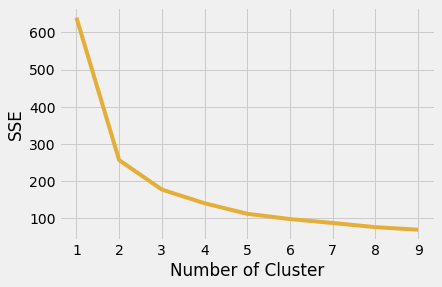

In [413]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1), sse, color='C2')
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [274]:
K1 = KneeLocator(np.arange(1, 10, 1), sse, curve="convex", direction="decreasing")
K1.elbow

2

In [275]:
#забиваем в модель 2 кластера
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=2, random_state=10)

In [276]:
#к какому кластеру алгоритм отнес каждлого пользователя
cluster = kmeans.labels_
cluster

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [277]:
data_adj['cluster'] = cluster

In [278]:
data_adj.groupby('cluster').size()

cluster
0    62
1    66
dtype: int64

In [279]:
means = data_adj.groupby('cluster').mean()
means

,count_of_items,count_of_lessons,count_of_finished_lessons,average_timespent_for_item_minutes,total_sum_of_points,total_time_spent_in_apps_minutes,average_points_for_lesson,average_points_for_item
cluster,,,,,,,,
0,75.225806,26.403226,27.854839,12.725806,83.532258,93.806452,74.887097,76.145161
1,27.121212,7.015152,6.863636,9.409091,25.878788,32.833333,25.227273,33.015152


На основании это результата (поскольку некоторые наши переменные являются относительно производными друг от друга), можем убрать из кластерного анализа некоторые переменные, например - count_of_items и count_of_lessons, кроме того средняя по показателю count_of_finished_lessons различается значительнее. Следовательно оставляем count_of_finished_lessons - гораздо более значимый показатель, на его основании можно выделить кластер пользователей - "отстающие" или "неактивные". Далее смотрим по временным показателям - оставим в кластерной модели среднее время выполнения тестового задания (average_timespent_for_item_minutes), а также общее время проведенное в системе. Можно назвать пользователей на "быстрых" и "медленных", на "потрятивших много времени в приложении" и наоборот. По показателям группы "Points" - может оставить total_sum_of_points - сколько всего получил баллов пользователь за прохождение всех курсов.

In [280]:
#Повторно выбираем переменные для анализа     
cols_1 = ["count_of_finished_lessons","average_timespent_for_item_minutes", "total_time_spent_in_apps_minutes", "average_points_for_lesson", "total_sum_of_points",]
data_1=df[cols_1]

In [281]:
data_adj_1 = data_1.copy()
data_adj_1.dropna (how='all') 

,count_of_finished_lessons,average_timespent_for_item_minutes,total_time_spent_in_apps_minutes,average_points_for_lesson,total_sum_of_points
0,6.0,0.133333,42.183333,6.375000,51.0
1,39.0,0.266667,392.333333,8.589744,335.0
2,6.0,0.283333,66.100000,6.333333,38.0
3,11.0,0.316667,149.666667,5.727273,63.0
5,39.0,0.350000,516.500000,8.500000,340.0
...,...,...,...,...,...
135,17.0,0.333333,248.800000,8.111111,146.0
136,17.0,0.100000,67.533333,6.176471,105.0
137,3.0,0.216667,32.583333,8.250000,33.0
138,4.0,0.266667,46.483333,5.400000,27.0


In [282]:
cat_col_1 = ["count_of_finished_lessons","average_timespent_for_item_minutes", "total_time_spent_in_apps_minutes", "average_points_for_lesson", "total_sum_of_points"]

In [283]:
for col in cat_col_1:
    labelencoder = LabelEncoder()
    data_adj_1[col] = labelencoder.fit_transform(data_adj_1[col])

In [284]:
data_adj_1.head(7)

,count_of_finished_lessons,average_timespent_for_item_minutes,total_time_spent_in_apps_minutes,average_points_for_lesson,total_sum_of_points
0,5,4,22,19,26
1,30,12,104,74,85
2,5,13,35,18,21
3,9,15,59,13,35
5,30,17,112,68,87
7,22,8,75,58,64
8,20,7,65,50,59


In [285]:
#стандартизация x текущее-x среднее/делим на стандартное отклонение
scaler_1 = StandardScaler()
scaled_data_1 = scaler.fit_transform(data_adj_1)
scaled_data_1 = pd.DataFrame(scaled_data_1, columns=data_adj_1.columns)

In [286]:
x_cluster_1=scaled_data_1.values
x_cluster_1

array([[-1.0176251 , -1.10732632, -1.10711391, -0.96823395, -0.84559236],
       [ 1.09692056,  0.15537095,  1.14182505,  0.79037467,  0.94870758],
       [-1.0176251 ,  0.31320811, -0.7505748 , -1.00020865, -0.99765168],
       [-0.67929779,  0.62888243, -0.09234877, -1.16008216, -0.57188559],
       [ 1.09692056,  0.94455675,  1.36123372,  0.59852645,  1.00953131],
       [ 0.42026595, -0.47597768,  0.34646859,  0.27877943,  0.31005845],
       [ 0.2511023 , -0.63381484,  0.07220774,  0.02298182,  0.15799913],
       [ 1.01233873,  2.20725402,  1.52579023,  0.56655175,  0.7662364 ],
       [-1.3559524 , -0.31814052, -1.40880084, -1.44785448, -1.51465336],
       [ 1.01233873, -0.94948916,  0.26419033,  1.2699952 ,  1.25282622],
       [-1.10220692, -0.63381484, -1.21681825, -1.38390507, -1.14971099],
       [-0.34097049,  0.47104527,  0.15448599,  0.88629877, -0.20694323],
       [-1.18678875,  0.15537095, -1.05226174, -0.84033514, -1.08888727],
       [-0.93304327, -1.10732632, -1.0

In [287]:
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=10)
    kmeans.fit(x_cluster_1)
    sse.append(kmeans.inertia_)

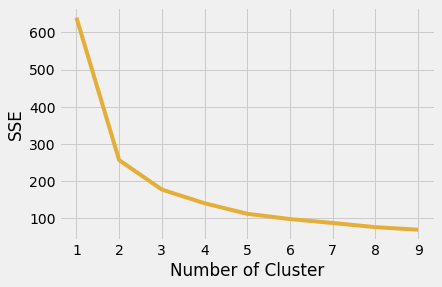

In [374]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1), sse, color='C2')
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [289]:
K1 = KneeLocator(np.arange(1, 10, 1), sse, curve="convex", direction="decreasing")
K1.elbow

3

In [290]:
#на этот раз забиваем в модель 3 кластера
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data_1)

KMeans(n_clusters=3, random_state=10)

In [291]:
data_adj_1['x_cluster_1'] = cluster

In [292]:
#к какому кластеру алгоритм отнес каждлого пользователя
cluster_1 = kmeans.labels_
cluster_1

array([1, 2, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1,
       1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [293]:
data_adj_1.groupby('x_cluster_1').size()

x_cluster_1
0    62
1    66
dtype: int64

In [294]:
means_1 = data_adj_1.groupby('x_cluster_1').mean()
means_1

,count_of_finished_lessons,average_timespent_for_item_minutes,total_time_spent_in_apps_minutes,average_points_for_lesson,total_sum_of_points
x_cluster_1,,,,,
0,27.854839,12.725806,93.806452,74.887097,83.532258
1,6.863636,9.409091,32.833333,25.227273,25.878788


In [295]:
#преобразовать массив в dataframe
df_2 = pd.DataFrame(data=x_cluster_1)
df_2

,0,1,2,3,4
0,-1.017625,-1.107326,-1.107114,-0.968234,-0.845592
1,1.096921,0.155371,1.141825,0.790375,0.948708
2,-1.017625,0.313208,-0.750575,-1.000209,-0.997652
3,-0.679298,0.628882,-0.092349,-1.160082,-0.571886
4,1.096921,0.944557,1.361234,0.598526,1.009531
...,...,...,...,...,...
123,-0.256389,0.786720,0.428747,0.150881,-0.054884
124,-0.256389,-1.423001,-0.723149,-1.032183,-0.298179
125,-1.271371,-0.318141,-1.189392,0.342729,-1.058475
126,-1.186789,0.155371,-0.997410,-1.287981,-1.088887


In [296]:
df_3=pd.DataFrame(data=cluster_1)
df_3

,0
0,1
1,2
2,1
3,1
4,2
...,...
123,0
124,1
125,1
126,1


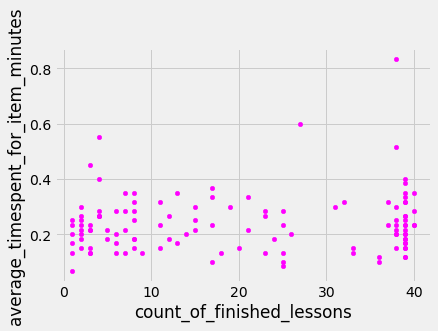

In [416]:
ax2 = df.plot.scatter(x="count_of_finished_lessons", y="average_timespent_for_item_minutes", color='magenta')

In [298]:
df_3[0].value_counts()

1    55
0    43
2    30
Name: 0, dtype: int64

In [300]:
df.reset_index(drop= True, inplace= True )

In [301]:
df

,id,password,last_login,is_superuser,is_staff,is_active,date_joined,email,key,first_name,...,total_sum_of_points_LOG,total_time_spent_in_apps_seconds,total_time_spent_in_apps_minutes,average_timespent_for_item_seconds,average_timespent_for_item_minutes,average_timespent_for_lesson_seconds,average_timespent_for_lesson_minutes,total_time_spent_in_apps_minutes_LOG,average_timespent_for_item_minutes_LOG,average_timespent_for_lesson_minutes_LOG
0,91,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,yakushev@gigant.pro,HR4HKC1V,Якушев,...,3.931826,2531.0,42.183333,8.0,0.133333,341.0,5.683333,3.742025,-2.014903,1.737538
1,138,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,Tyakubov@it-service.spb.ru,QTGZP7DS,Якубов,...,5.814131,23540.0,392.333333,16.0,0.266667,650.0,10.833333,5.972112,-1.321756,2.382628
2,224,NaN,NaN,False,False,True,2021-08-20 14:51:36.750,yakimov@vtprint.pro,M75SE7NE,Якимов,...,3.637586,3966.0,66.100000,17.0,0.283333,729.0,12.150000,4.191169,-1.261131,2.497329
3,249,NaN,NaN,False,False,True,2021-09-30 17:19:53.443,Yusova@blackyar.ru,88UP6N7O,Юсова,...,4.143135,8980.0,149.666667,19.0,0.316667,867.0,14.450000,5.008411,-1.149906,2.670694
4,38,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,ls@uralcpt.ru,L86V2DM2,Шихалева,...,5.828946,30990.0,516.500000,21.0,0.350000,820.0,13.666667,6.247075,-1.049822,2.614960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,139,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,Alexander.Andreichev@softline.com,96TVLXRE,Андреичев,...,4.983607,14928.0,248.800000,20.0,0.333333,882.0,14.700000,5.516649,-1.098612,2.687847
124,94,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,alidmitry@mika.ru,MY6VL6UP,Алибеков,...,4.653960,4052.0,67.533333,6.0,0.100000,263.0,4.383333,4.212621,-2.302585,1.477809
125,86,NaN,NaN,False,False,True,2021-08-03 11:33:05.650,nat@zeongroup.ru,755UR1BF,Ажбалова,...,3.496508,1955.0,32.583333,13.0,0.216667,572.0,9.533333,3.483801,-1.529395,2.254794
126,35,NaN,NaN,False,False,True,2021-08-03 11:33:05.650,avtonomova@gsgroup.it,6VD2PQ7E,Автономова,...,3.295837,2789.0,46.483333,16.0,0.266667,627.0,10.450000,3.839094,-1.321756,2.346602


In [302]:
df_new=df.join(df_3)
df_new['cluster']=df_new[0]
df_new['cluster']=df_new['cluster'].values.astype('str')
df_new

,id,password,last_login,is_superuser,is_staff,is_active,date_joined,email,key,first_name,...,total_time_spent_in_apps_minutes,average_timespent_for_item_seconds,average_timespent_for_item_minutes,average_timespent_for_lesson_seconds,average_timespent_for_lesson_minutes,total_time_spent_in_apps_minutes_LOG,average_timespent_for_item_minutes_LOG,average_timespent_for_lesson_minutes_LOG,0,cluster
0,91,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,yakushev@gigant.pro,HR4HKC1V,Якушев,...,42.183333,8.0,0.133333,341.0,5.683333,3.742025,-2.014903,1.737538,1,1
1,138,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,Tyakubov@it-service.spb.ru,QTGZP7DS,Якубов,...,392.333333,16.0,0.266667,650.0,10.833333,5.972112,-1.321756,2.382628,2,2
2,224,NaN,NaN,False,False,True,2021-08-20 14:51:36.750,yakimov@vtprint.pro,M75SE7NE,Якимов,...,66.100000,17.0,0.283333,729.0,12.150000,4.191169,-1.261131,2.497329,1,1
3,249,NaN,NaN,False,False,True,2021-09-30 17:19:53.443,Yusova@blackyar.ru,88UP6N7O,Юсова,...,149.666667,19.0,0.316667,867.0,14.450000,5.008411,-1.149906,2.670694,1,1
4,38,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,ls@uralcpt.ru,L86V2DM2,Шихалева,...,516.500000,21.0,0.350000,820.0,13.666667,6.247075,-1.049822,2.614960,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,139,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,Alexander.Andreichev@softline.com,96TVLXRE,Андреичев,...,248.800000,20.0,0.333333,882.0,14.700000,5.516649,-1.098612,2.687847,0,0
124,94,NaN,NaN,False,False,True,2021-08-03 11:33:05.653,alidmitry@mika.ru,MY6VL6UP,Алибеков,...,67.533333,6.0,0.100000,263.0,4.383333,4.212621,-2.302585,1.477809,1,1
125,86,NaN,NaN,False,False,True,2021-08-03 11:33:05.650,nat@zeongroup.ru,755UR1BF,Ажбалова,...,32.583333,13.0,0.216667,572.0,9.533333,3.483801,-1.529395,2.254794,1,1
126,35,NaN,NaN,False,False,True,2021-08-03 11:33:05.650,avtonomova@gsgroup.it,6VD2PQ7E,Автономова,...,46.483333,16.0,0.266667,627.0,10.450000,3.839094,-1.321756,2.346602,1,1


In [303]:
df_new.cluster.value_counts()

1    55
0    43
2    30
Name: cluster, dtype: int64

Text(0, 0.5, 'total_time_spent_in_apps_minutes')

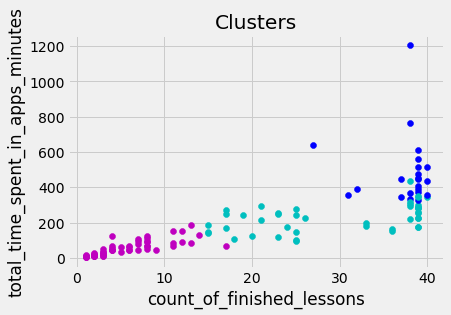

In [383]:
#Строим графики, в которых разбиваем пользователей приложения на полученные кластеры
colors = {"0":"c", "1":"m", "2":"b"}
fig, ax = plt.subplots()
for i in range(len(df_new['count_of_finished_lessons'])):
    ax.scatter(df_new['count_of_finished_lessons'][i], df_new['total_time_spent_in_apps_minutes'][i], color=colors[df_new['cluster'][i]])
ax.set_title("Clusters")
ax.set_xlabel("count_of_finished_lessons")
ax.set_ylabel("total_time_spent_in_apps_minutes")

Text(0, 0.5, 'average_points_for_lesson')

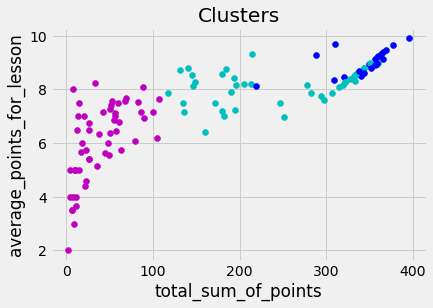

In [384]:
#Строим графики, в которых разбиваем пользователей приложения на полученные кластеры
fig, ax = plt.subplots()
for i in range(len(df_new['total_sum_of_points'])):
    ax.scatter(df_new['total_sum_of_points'][i], df_new['average_points_for_lesson'][i], color=colors[df_new['cluster'][i]])
ax.set_title("Clusters")
ax.set_xlabel("total_sum_of_points")
ax.set_ylabel("average_points_for_lesson")

Text(0, 0.5, 'average_points_for_lesson')

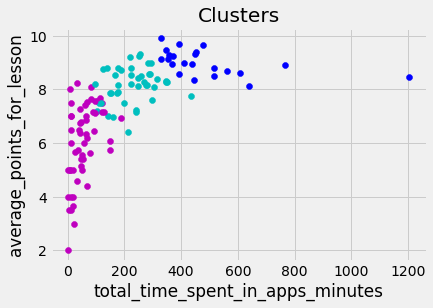

In [382]:
#Строим графики, в которых разбиваем пользователей приложения на полученные кластеры
fig, ax = plt.subplots()
for i in range(len(df_new['total_time_spent_in_apps_minutes'])):
    ax.scatter(df_new['total_time_spent_in_apps_minutes'][i], df_new['average_points_for_lesson'][i], color=colors[df_new['cluster'][i]])
ax.set_title("Clusters")
ax.set_xlabel("total_time_spent_in_apps_minutes")
ax.set_ylabel("average_points_for_lesson")

Этот график демонстрирует линейную зависимость. Попробуем еще раз посчитать корреляцию и построить корреляционную модель.

In [307]:
x_4 = abs(df.total_time_spent_in_apps_minutes)
y_4 = df.average_points_for_lesson

In [309]:
x_4=x_4[~np.isnan (x_4)]
y_4=y_4[~np.isnan (y_4)]

In [310]:
np.corrcoef(x_4, y_4)

array([[1.        , 0.63235177],
       [0.63235177, 1.        ]])

In [311]:
#коэффициент корреляции с помощью scipy
st.pearsonr(x_4, y_4)

(0.6323517668728742, 9.448739649370651e-15)

In [314]:
#коэффициент корреляции по Кендаллу - лучше всего в нашем случае, поскольку второй показатель не имеет нормального распределения
st.kendalltau(x_4, y_4)

KendalltauResult(correlation=0.6148244959473109, pvalue=2.902953846329418e-23)

In [315]:
#коэффициент корреляции по Спирману с помощью использования рангов
st.spearmanr(x_4, y_4)

SpearmanrResult(correlation=0.8183541956121546, pvalue=3.6787283863215134e-30)

Последний тест показывает достаточную тестоту связи. Попробуем по этим двум показателям рассчитать модель

In [316]:
x_4 = sm.add_constant(x_4)  # добавить константу, чтобы был свободный член
model = sm.OLS(y_4, x_4)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                                OLS Regression Results                               
Dep. Variable:     average_points_for_lesson   R-squared:                       0.400
Model:                                   OLS   Adj. R-squared:                  0.395
Method:                        Least Squares   F-statistic:                     78.62
Date:                       Mon, 29 May 2023   Prob (F-statistic):           9.45e-15
Time:                               23:10:06   Log-Likelihood:                -198.64
No. Observations:                        120   AIC:                             401.3
Df Residuals:                            118   BIC:                             406.9
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Результат - не очень большой коэффициент детерминации (должны быть хотя бы 0.5, то есть данная модель объясняет слишком маленький процент - около 40%. Если бы мы могли построить линейную модель, то она получилось бы следующей - y=0.0056*x+6.2443.
Возможно имеет смысл продолжать поиск, и добавить к модель другие параметры/независимые переменные. 